In [1]:
import torch
from transformers import BertTokenizer, BertModel

# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
import logging
#logging.basicConfig(level=logging.INFO)

import matplotlib.pyplot as plt
# % matplotlib inline

# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [4]:
text = "I love natural language processing. It's a fascinating field."
tokens = tokenizer.tokenize(tokenizer.decode(tokenizer.encode(text)))

# Add special tokens [CLS] and [SEP]
# tokens = ['[CLS]'] + tokens + ['[SEP]']

 # Input data

In [6]:
import pandas as pd

data = pd.read_csv("/home/ubuntu/duc.nm195858/keyext_LLM/reviews/singapore.csv")

In [21]:
# data['text'][0]
texts = data['text'][0].strip().split('.')
# for text in texts:

# tokens = tokenizer.tokenize(tokenizer.decode(tokenizer.encode(text)))


In [24]:
for i,text in enumerate(texts):
  if i == 0:
    marked_text = "[CLS] " + text + " [SEP]"
  else:
    marked_text += text +" [SEP]"

In [25]:
marked_text

"[CLS] always been a big supporter of wolf [SEP] \xa0 would drive distant to get my buger fix [SEP] \xa0 today was just a big disappointment [SEP] \xa0got a soggy burger unlike wolf's standard [SEP] \xa0 whoever cooked the burger needs to be retrained [SEP] \xa0 not letting the meat rest could be the ussue here [SEP] \xa09/4Well i previously gave a 1 star due to an absolutely soggy french dip burger but got a message/email from the owner himself inviting to make good and make good they did!!! Kudos to a biz/owner that can be bothered with customer feedback [SEP] \xa0Really do appreciate the boss taking the initiative to engage the customer and for that not only he won back a loyal customer and i am sure i shall be spreading the Wolf Gospel so to speak - thank you [SEP]Sep 29th '18Checked in again for the usual Double and Shroom with Sweet potatoe fries [SEP] \xa0 Glad to report all good [SEP] [SEP]"

In [26]:
# Split the sentence into tokens.
tokenized_text = tokenizer.tokenize(marked_text)

# Map the token strings to their vocabulary indeces.
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

# Display the words with their indeces.
for tup in zip(tokenized_text, indexed_tokens):
    print('{:<12} {:>6,}'.format(tup[0], tup[1]))

[CLS]           101
always        2,467
been          2,042
a             1,037
big           2,502
supporter    10,129
of            1,997
wolf          4,702
[SEP]           102
would         2,052
drive         3,298
distant       6,802
to            2,000
get           2,131
my            2,026
bug          11,829
##er          2,121
fix           8,081
[SEP]           102
today         2,651
was           2,001
just          2,074
a             1,037
big           2,502
disappointment 10,520
[SEP]           102
got           2,288
a             1,037
so            2,061
##ggy        22,772
burger       15,890
unlike        4,406
wolf          4,702
'             1,005
s             1,055
standard      3,115
[SEP]           102
whoever       9,444
cooked       12,984
the           1,996
burger       15,890
needs         3,791
to            2,000
be            2,022
re            2,128
##train      23,654
##ed          2,098
[SEP]           102
not           2,025
letting       5,59

In [42]:
word_index = tokenized_text.index('##er')

In [43]:
word_index

16

In [27]:
tokens_tensor = torch.tensor([indexed_tokens])

In [ ]:
# Load pre-trained model (weights)
model = BertModel.from_pretrained('bert-base-uncased',
                                  output_hidden_states = True, # Whether the model returns all hidden-states.
                                  )

# Put the model in "evaluation" mode, meaning feed-forward operation.
model.eval()


In [30]:
# Run the text through BERT, and collect all of the hidden states produced
# from all 12 layers. 
with torch.no_grad():

    outputs = model(tokens_tensor) #, segments_tensors)

    # Evaluating the model will return a different number of objects based on 
    # how it's  configured in the `from_pretrained` call earlier. In this case, 
    # becase we set `output_hidden_states = True`, the third item will be the 
    # hidden states from all layers. See the documentation for more details:
    # https://huggingface.co/transformers/model_doc/bert.html#bertmodel
    hidden_states = outputs[2]

In [32]:
print ("Number of layers:", len(hidden_states), "  (initial embeddings + 12 BERT layers)")
layer_i = 0

print ("Number of batches:", len(hidden_states[layer_i]))
batch_i = 0

print ("Number of tokens:", len(hidden_states[layer_i][batch_i]))
token_i = 0

print ("Number of hidden units:", len(hidden_states[layer_i][batch_i][token_i]))

Number of layers: 13   (initial embeddings + 12 BERT layers)
Number of batches: 1
Number of tokens: 186
Number of hidden units: 768


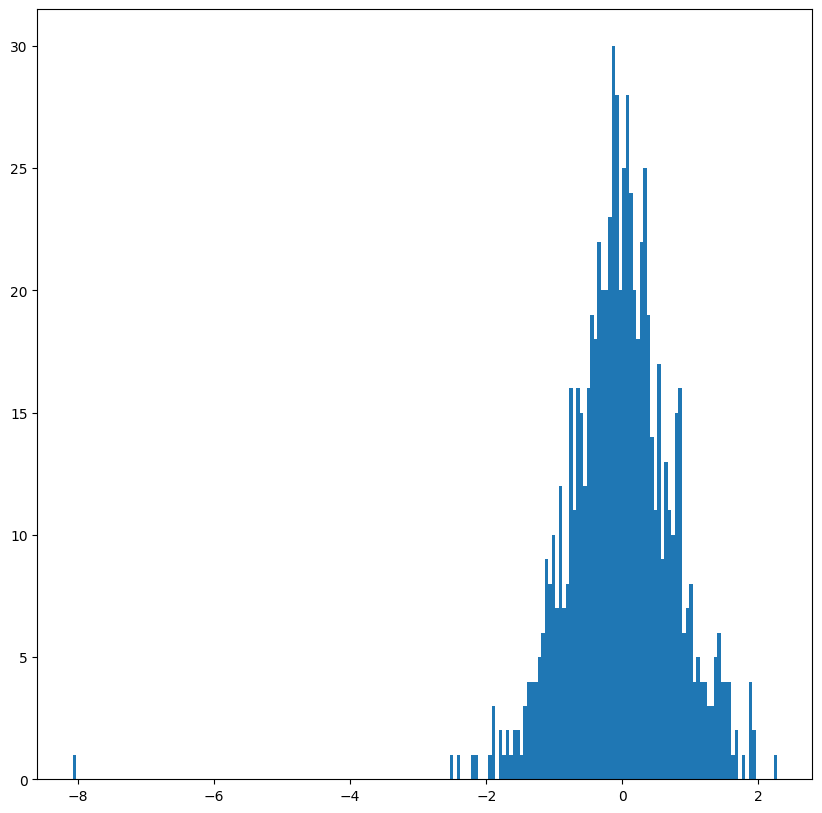

In [33]:
# For the 5th token in our sentence, select its feature values from layer 5.
token_i = 5
layer_i = 5
vec = hidden_states[layer_i][batch_i][token_i]

# Plot the values as a histogram to show their distribution.
plt.figure(figsize=(10,10))
plt.hist(vec, bins=200)
plt.show()